# Disaster Tweet Analysis with Natural Language Processing

<img src = "https://www.stevens.edu/sites/stevens_edu/files/styles/news_detail/public/twitter-hurricane-shutterstock_1497390680.jpg?itok=BrXiCejS" width = 75%>

Twitter has been a key communication channel in times of emergency.
The smartphones allows to announce an emergency being observed in real-time. Therefore, it serves a very useful tool for the agencies interested in programatically monitoring Twitter. Some efforts include the applications developed by disaster relief organizations and news agencies.

## Target 🎯

It’s not always clear whether a person’s words are actually announcing a disaster. The goal is to build a machine learning model that predicts which Tweets talks about real disasters and which ones do not. 

**Dataset**

This dataset was created by the company figure-eight and originally shared on their ‘Data For Everyone’s [website]("https://www.figure-eight.com/data-for-everyone/").

They hand-classified a dataset of 10,000 tweets. The dataset may contain text that may be considered as profane, vulgar, or offensive.

## Deliverables

We are asked to provide predictions on a seperate dataset including tweet texts by predicting 1 if the tweet describes a real disaster, otherwise 0. The file should contain a header and have the following format:

>id,target  
0,0  
2,0  
3,1  
9,0  
11,0  

# Setup Libraries and Load Tweet Data 🐦

Please note that in this notebook I am inspired by bootcamp class material called "Sentiment Analysis with RNN"

In [4]:
# importing Tensorflow & other librairies
import pandas as pd
import numpy as np 

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [5]:
# importing train dataset with Pandas 
dataset = pd.read_csv("data/train.csv")
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# let's take the columns we're interested in 
train = dataset[["text", "target"]]
train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


### Preprocessing

Let's walk down a preprocessing phase to clean up the character strings and encode the words. It is neccessary to represent them as integers.

In [7]:
#download all language elements related to the English language
!python -m spacy download en_core_web_sm

2022-10-24 15:55:46.783099: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
# importing Spacy and french initialisation and  Loading `en_core_news_sm`
import en_core_web_sm
nlp = en_core_web_sm.load()

In [9]:
# Importing the stop words 
from spacy.lang.en.stop_words import STOP_WORDS

In [10]:
# cleaning texts in order to prepare them for training. 
# --- 
print("\nStep 1 removing characters from strings that are not alphanumeric (except for whitespaces.)")
train["text_clean"] = train["text"].\
                      apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
print("\nStep 2 replaceing double whitespaces with single whitespaces")              
train["text_clean"] = train["text_clean"].\
                      apply(lambda x: x.replace(" +"," ").lower().strip())
print("\nStep 3 converting all characters to lowercase")                     
train["text_clean"] = train["text_clean"].\
                      apply(lambda x: x.replace("http"," ").lower().strip())
print("\nStep 4 trimming whitespaces at initial and ending locations.")           
train["text_clean"] = train["text_clean"].\
                      apply(lambda x: x.replace(" t "," ").lower().strip())
print("\nStep 5 (with spacy) replacing all tokens oin tweets with lemma_ and removing all the stop words.")                           
train["text_clean"] = train["text_clean"].\
                      apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))
print("\n...Done...\n")
train


Step 1 removing characters from strings that are not alphanumeric (except for whitespaces.)

Step 2 replaceing double whitespaces with single whitespaces

Step 3 converting all characters to lowercase

Step 4 trimming whitespaces at initial and ending locations.

Step 5 (with spacy) replacing all tokens oin tweets with lemma_ and removing all the stop words.

...Done...



,text,target,text_clean
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfire pour...
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,giant crane hold bridge collapse nearby home ...
7609,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5 km s volcano hawaii tcozdtoyd...
7611,Police investigating after an e-bike collided ...,1,police investigate ebike collide car little po...


In [11]:
#Checkpoint
train.to_csv("data/train_clean.csv", index=False)

 ## Word clouds

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Number of words found 3271 

Figure - Word clouds in cleaned text for the disaster tweets



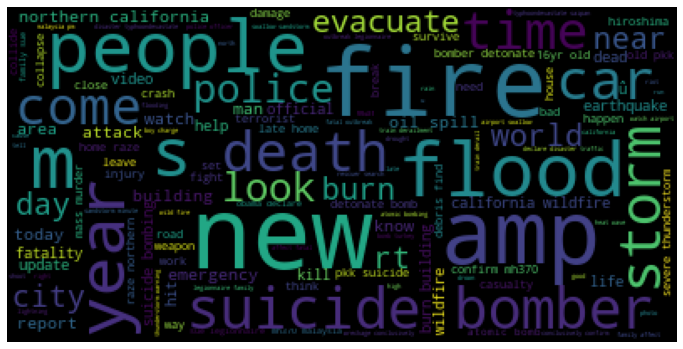

In [13]:
# creating wordclouds for disaster tweets
mask1 = train["target"] == 1 
words_d = train.loc[mask1,"text_clean"].values
print("Number of words found", len(words_d),"\n")
print("Figure - Word clouds in cleaned text for the disaster tweets\n")
plt.figure(figsize=(12,8))
word_cloud = WordCloud(background_color='black',
                       max_font_size = 60
                         ).generate(" ".join(words_d))
plt.imshow(word_cloud)
plt.axis('off')
plt.savefig('figs/wordcloud_disaster.png')
plt.show()

Number of words found 4342 

Figure - Word clouds in cleaned text for NON disaster tweets



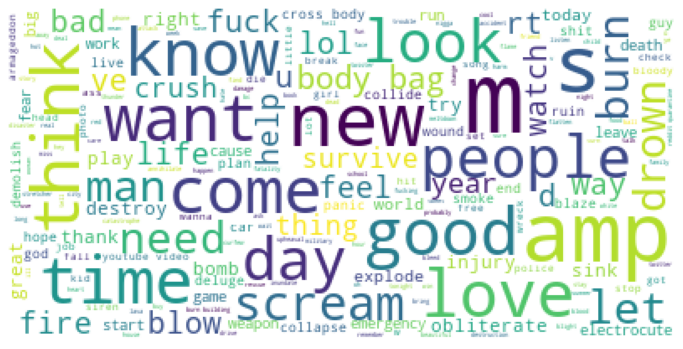

In [14]:
# creating wordclouds for NON disaster tweets
mask2 = train["target"] == 0 
words_nd = train.loc[mask2,"text_clean"].values
print("Number of words found", len(words_nd),"\n")
print("Figure - Word clouds in cleaned text for NON disaster tweets\n")
plt.figure(figsize=(12,8))
word_cloud = WordCloud(background_color='white',
                      max_font_size = 60
                         ).generate(" ".join(words_nd))
plt.imshow(word_cloud)
plt.axis('off')
plt.savefig('figs/wordcloud_NONdisaster.png')
plt.show()

## Tokenizer process

Encoding reviews by the use of 1500 most common words below. It is neccessary to verify whether it resulted in any empty cells.

In [15]:
#train = pd.read_csv("train_clean.csv" )

In [16]:
# initiatin the tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1500) 
tokenizer.fit_on_texts(train["text_clean"]) #fitting

In [17]:
# creating encoded text and len of reviews
train["text_encoded"] = tokenizer.texts_to_sequences(train["text_clean"])
train["len_review"] = train["text_encoded"].apply(lambda x: len(x))

In [18]:
print("Number of empty cells= ", train["text_encoded"].isna().sum())
train = train[train["text_clean"]!=0]

Number of empty cells=  0


In [19]:
train.head()

,text,target,text_clean,text_encoded,len_review
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[410, 172, 1383]",3
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[118, 2, 161, 511, 1015]",5
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1384, 441, 323, 292, 187, 323, 279, 383]",8
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,"[7, 68, 187, 279, 35]",5
4,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfire pour...,"[255, 180, 122, 173, 68, 111]",6


In [20]:
# tenserflow is not capable of creating a tensor with different lenghts
# need to create a single np array before creating tf dataset 
# to ensure equal length for each text, apply padding ("pre" or "post")
train_pad = tf.keras.preprocessing.sequence.\
            pad_sequences(train.text_encoded, padding="pre")
# keep the length to predictions
maxlen = train_pad.shape[1]
print(maxlen)

18


In [59]:
# checkpoint
#merging preprocessed text with the df
left = dataset
right = train
dataset_train= pd.merge(left, right, on='text')
train.to_csv("data/train_clean_tokenized.csv", index=False)

## Splitting data into test and train sets

In [22]:
# let's apply tensor_slices of  data set
full_ds = tf.data.Dataset.from_tensor_slices((train_pad, train.target.values))

In [23]:
# splitting into train n test sets by keeping about 85% in the train set.
# I use the `.take` and `.skip` methods on the tensorflow dataset.
# Then, I use `.shuffle` on the train set, and `.batch`on both sets to organise them by batches of 64 observations.
TAKE_SIZE = int(0.85*train.shape[0])

train_data = full_ds.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train_data = train_data.batch(64)

test_data = full_ds.skip(TAKE_SIZE)
test_data = test_data.batch(64)

In [24]:
 # let's check the batches
text0 = []
for text, target in train_data.take(1):
  text0 = text
  print(text, target)

tf.Tensor(
[[   0    0    0 ...  312  202  387]
 [   0    0    0 ...   38  107  203]
 [   0    0    0 ...  235  386 1272]
 ...
 [   0    0    0 ...  569  537  116]
 [   0    0    0 ... 1050   81  372]
 [   0    0    0 ...    1  176    1]], shape=(64, 18), dtype=int32) tf.Tensor(
[0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1
 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0], shape=(64,), dtype=int64)


# Deep Learning Models ⚡

The predictions will be carried out by binary classification since there are two labels assigned to the target. Binary classification is often used to predict a value of 0 or 1 for the first or second class. It is often implemented as predicting the probability.

    Deep Learning Models
    ├── GAP1d
    ├── SimpleRNN
    ├── GRU
    ├── LSTM 
    Evaluation of Performances


In [25]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import  SimpleRNN, Dense, GRU, LSTM, Dropout
import json

### GAP1D

One Embed - GlobalAveragePooling1D

In [26]:
vocab_size = len(tokenizer.word_index)
model_gap = tf.keras.Sequential([
                  # Word Embedding layer       
                  Embedding(vocab_size+1, 128, input_shape=[text0.shape[1],],name="embedding"),
                  # Gobal average pooling
                  GlobalAveragePooling1D (), 
                  # Dense layers once the data is flat
                  Dense(32, activation='relu'),
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),
                  # output layer for the target and sigmoid activation
                  Dense(1, activation="sigmoid")
])

optimizer= tf.keras.optimizers.Adam()
model_gap.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model_gap.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           2610432   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                        

In [27]:
# fitting model on 15 epochs with weights 
model_gap.fit(train_data,
          epochs=30, 
          validation_data=test_data)
#saving model and its history
fname= 'gap1d'
#model_gap.save("models/model_"+fname+".h5")
json.dump(model_gap.history.history, open("/content/models/hist/"+fname+"_history.json", 'w'))

Epoch 1/30
102/102 [==============================] - 5s 34ms/step - loss: 0.6788 - accuracy: 0.5787 - val_loss: 0.6560 - val_accuracy: 0.6147
Epoch 2/30
102/102 [==============================] - 3s 33ms/step - loss: 0.5261 - accuracy: 0.7597 - val_loss: 0.4663 - val_accuracy: 0.7811
Epoch 3/30
102/102 [==============================] - 3s 32ms/step - loss: 0.3993 - accuracy: 0.8305 - val_loss: 0.4641 - val_accuracy: 0.7750
Epoch 4/30
102/102 [==============================] - 3s 31ms/step - loss: 0.3636 - accuracy: 0.8459 - val_loss: 0.4775 - val_accuracy: 0.7688
Epoch 5/30
102/102 [==============================] - 3s 32ms/step - loss: 0.3444 - accuracy: 0.8547 - val_loss: 0.4920 - val_accuracy: 0.7741
Epoch 6/30
102/102 [==============================] - 4s 37ms/step - loss: 0.3333 - accuracy: 0.8611 - val_loss: 0.5348 - val_accuracy: 0.7513
Epoch 7/30
102/102 [==============================] - 5s 44ms/step - loss: 0.3223 - accuracy: 0.8676 - val_loss: 0.5536 - val_accuracy: 0.7496

### SimpleRNN

In [28]:
# following a similar architecture to the previous section
vocab_size = len(tokenizer.word_index)
model_rnn = tf.keras.Sequential([
                  # Word Embedding layer           
                  Embedding(vocab_size+1, 128, input_shape=[text0.shape[1],],name="embedding"),
                  # Gobal average pooling
                  SimpleRNN(units=64, return_sequences=True), # maintains the sequential nature
                  SimpleRNN(units=16, return_sequences=False), # returns the last output
                  # Dense layers once the data is flat
                  Dense(4, activation='relu'),
                  Dense(2, activation='relu'),
                  # output layer for the target and sigmoid activation
                  Dense(1, activation="sigmoid")
])

optimizer= tf.keras.optimizers.Adam()
model_rnn.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           2610432   
                                                                 
 simple_rnn (SimpleRNN)      (None, 18, 64)            12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                1296      
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 2,624,161
Trainable params: 2,624,161
No

In [29]:
# fitting model on 15 epochs
model_rnn.fit(train_data,
          epochs=30, 
          validation_data=test_data)
#saving model and its history
fname= 'simpleRNN'
#model_rnn.save("models/model_"+fname+".h5")
json.dump(model_rnn.history.history, open("/content/models/hist/"+fname+"_history.json", 'w'))

Epoch 1/30
102/102 [==============================] - 7s 46ms/step - loss: 0.6379 - accuracy: 0.6368 - val_loss: 0.6060 - val_accuracy: 0.7522
Epoch 2/30
102/102 [==============================] - 5s 48ms/step - loss: 0.5259 - accuracy: 0.8132 - val_loss: 0.5906 - val_accuracy: 0.7566
Epoch 3/30
102/102 [==============================] - 4s 42ms/step - loss: 0.4478 - accuracy: 0.8683 - val_loss: 0.6037 - val_accuracy: 0.7242
Epoch 4/30
102/102 [==============================] - 4s 42ms/step - loss: 0.3902 - accuracy: 0.8932 - val_loss: 0.6352 - val_accuracy: 0.7294
Epoch 5/30
102/102 [==============================] - 4s 43ms/step - loss: 0.3468 - accuracy: 0.9077 - val_loss: 0.6535 - val_accuracy: 0.7242
Epoch 6/30
102/102 [==============================] - 4s 44ms/step - loss: 0.3170 - accuracy: 0.9147 - val_loss: 0.7061 - val_accuracy: 0.7067
Epoch 7/30
102/102 [==============================] - 6s 56ms/step - loss: 0.3010 - accuracy: 0.9166 - val_loss: 0.7108 - val_accuracy: 0.6909

### GRU

In [30]:
vocab_size = len(tokenizer.word_index)
model_gru = tf.keras.Sequential([
                  Embedding(vocab_size+1, 32, input_shape=[text0.shape[1],],name="embedding"),
                  GRU(units=16, return_sequences=True), # maintains the sequential nature
                  GRU(units=8, return_sequences=False), # returns the last output
                  Dense(4, activation='relu'),
                  Dense(2, activation='relu'),
                  # output layer for the target and sigmoid activation
                  Dense(1, activation="sigmoid")
])

optimizer= tf.keras.optimizers.Adam()
model_gru.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 32)            652608    
                                                                 
 gru (GRU)                   (None, 18, 16)            2400      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 655,681
Trainable params: 655,681
Non-tr

In [31]:
# fitting model on 15 epochs
model_gru.fit(train_data,
          epochs=30, 
          validation_data=test_data)
#saving model and its history
fname= 'GRU'
#model_gru.save("models/model_"+fname+".h5")
json.dump(model_gru.history.history, open("/content/models/hist/"+fname+"_history.json", 'w'))

Epoch 1/30
102/102 [==============================] - 8s 36ms/step - loss: 0.6453 - accuracy: 0.7058 - val_loss: 0.5467 - val_accuracy: 0.7671
Epoch 2/30
102/102 [==============================] - 3s 28ms/step - loss: 0.4834 - accuracy: 0.8119 - val_loss: 0.4905 - val_accuracy: 0.7662
Epoch 3/30
102/102 [==============================] - 3s 27ms/step - loss: 0.4021 - accuracy: 0.8379 - val_loss: 0.4970 - val_accuracy: 0.7776
Epoch 4/30
102/102 [==============================] - 3s 27ms/step - loss: 0.3686 - accuracy: 0.8552 - val_loss: 0.5539 - val_accuracy: 0.7548
Epoch 5/30
102/102 [==============================] - 3s 28ms/step - loss: 0.3499 - accuracy: 0.8679 - val_loss: 0.5771 - val_accuracy: 0.7391
Epoch 6/30
102/102 [==============================] - 4s 37ms/step - loss: 0.3349 - accuracy: 0.8761 - val_loss: 0.5794 - val_accuracy: 0.7557
Epoch 7/30
102/102 [==============================] - 3s 28ms/step - loss: 0.3241 - accuracy: 0.8846 - val_loss: 0.6306 - val_accuracy: 0.7320

### LSTM

In [32]:
vocab_size = len(tokenizer.word_index)
model_lstm = tf.keras.Sequential([
                  Embedding(vocab_size+1, 128, input_shape=[text0.shape[1],],name="embedding"),
                  LSTM(units=64, return_sequences=True), # maintains the sequential nature
                  LSTM(units=32, return_sequences=False), # returns the last output
                  Dense(8, activation='relu'),
                  Dense(2, activation='relu'),
                  Dropout(rate=0.35), # any help of dropout on overfitting ?
                  # output layer for the target and sigmoid activation
                  Dense(1, activation="sigmoid")
])

optimizer= tf.keras.optimizers.Adam()
model_lstm.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           2610432   
                                                                 
 lstm (LSTM)                 (None, 18, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [33]:
# fitting model on 15 epochs
model_lstm.fit(train_data,
          epochs=30, 
          validation_data=test_data)
#saving model and its history
fname= 'LSTM'
#model_lstm.save("models/model_"+fname+".h5")
json.dump(model_lstm.history.history, open("/content/models/hist/"+fname+"_history.json", 'w'))

Epoch 1/30
102/102 [==============================] - 12s 77ms/step - loss: 0.6451 - accuracy: 0.6237 - val_loss: 0.5546 - val_accuracy: 0.7566
Epoch 2/30
102/102 [==============================] - 7s 68ms/step - loss: 0.5288 - accuracy: 0.7231 - val_loss: 0.5124 - val_accuracy: 0.7434
Epoch 3/30
102/102 [==============================] - 7s 67ms/step - loss: 0.4950 - accuracy: 0.7435 - val_loss: 0.5353 - val_accuracy: 0.7215
Epoch 4/30
102/102 [==============================] - 7s 69ms/step - loss: 0.4776 - accuracy: 0.7503 - val_loss: 0.5117 - val_accuracy: 0.7478
Epoch 5/30
102/102 [==============================] - 7s 67ms/step - loss: 0.4695 - accuracy: 0.7575 - val_loss: 0.5029 - val_accuracy: 0.7601
Epoch 6/30
102/102 [==============================] - 7s 68ms/step - loss: 0.4638 - accuracy: 0.7566 - val_loss: 0.5413 - val_accuracy: 0.7285
Epoch 7/30
102/102 [==============================] - 8s 75ms/step - loss: 0.4513 - accuracy: 0.7659 - val_loss: 0.5335 - val_accuracy: 0.745

# Evaluation of Models

Let's find the models giving best score

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [35]:
# for loading history files from local, uncomment below if neccessary
"""
gap1d_history = json.load(open("models/hist/gap1d_history.json", 'r'))
simpleRNN_history = json.load(open("models/hist/simpleRNN_history.json", 'r'))
GRU_history = json.load(open("models/hist/GRU_history.json", 'r'))
LSTM_history = json.load(open("models/hist/LSTM_history.json", 'r'))

model_hist = [gap1d_history,
              simpleRNN_history,
              GRU_history,
              LSTM_history,
]
"""

model_hist = [model_gap.history.history,
              model_rnn.history.history,
              model_gru.history.history,
              model_lstm.history.history,
]

model_name =["Baseline GAP1d",
             "Simple RNN",
             "GRU",
             "LSTM"]

Figure - Comparison of deep learning models' performances



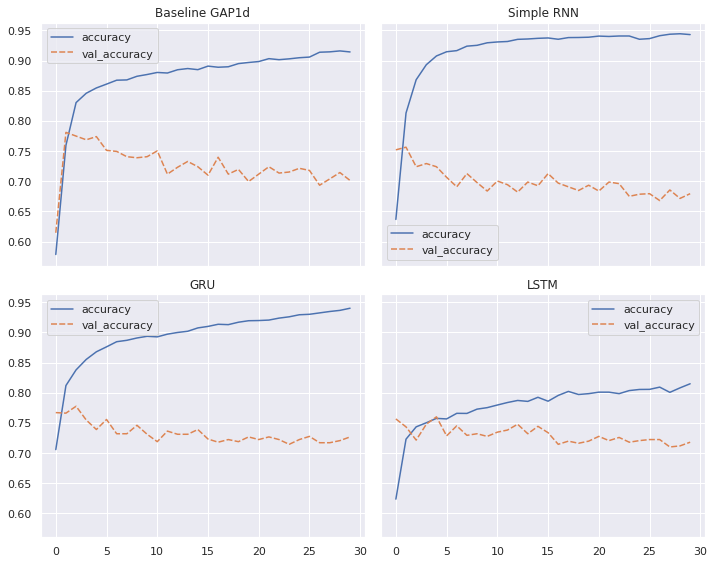

In [36]:
print("Figure - Comparison of deep learning models' performances\n")

sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2,2, figsize = (10,8),
                         sharex=True, sharey=True)

for ii,ax in enumerate(axes.ravel()):
  f0=sns.lineplot(data = pd.DataFrame(model_hist[ii])[["accuracy","val_accuracy"]],
            ax = ax).set(title=model_name[ii])
fig.tight_layout()
fig.savefig("figs/models_accuracy.png")

After iterations on each model, the figure above shows us that

* Baseline GAP1d has validation above 0.75 up to 10 epochs and then it starts to overfit on the train data.
* Simple RNN model continously learns but results in important overfitting.
* GRU model learns well and scores between 0.70 and 0.75 on the test data. It overfits quickly.
* LSTM model learns much less than others. The rate of overfit is not much. The scores on test set are between 0.70 and 0.75.

There is a fifty-fifty chance of guessing whether a tweet talks about disaster or not. All the models seem to increase the precitions relative to this dump model. None of the models improve their test scores as good as the scores of train. Overfitting is common. I choose GAP1d model to use in the next section.

*Please note that the values in X-axis represent the indices of df starting from 0. The epoch number is the value on X-axis plus 1.*

## Exporting final model

In [39]:
# following a similar architecture to the previous section
vocab_size = len(tokenizer.word_index)
finalmodel = tf.keras.Sequential([
                  # Word Embedding layer       
                  Embedding(vocab_size+1, 128, input_shape=[text0.shape[1],],name="embedding"),
                  # Gobal average pooling
                  GlobalAveragePooling1D (), 
                  # Dense layers once the data is flat
                  Dense(32, activation='relu'),
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),
                  # output layer for the target and sigmoid activation
                  Dense(1, activation="sigmoid")
])

optimizer= tf.keras.optimizers.Adam()
finalmodel.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
finalmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           2610432   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                      

In [40]:
# fitting model on 15 epochs
finalmodel.fit(train_data,
          epochs=10)
#saving model and its history
fname= 'LSTM'
finalmodel.save("models/model_final.h5")

Epoch 1/10
102/102 [==============================] - 5s 32ms/step - loss: 0.6236 - accuracy: 0.6453
Epoch 2/10
102/102 [==============================] - 3s 31ms/step - loss: 0.4340 - accuracy: 0.8147
Epoch 3/10
102/102 [==============================] - 3s 31ms/step - loss: 0.3713 - accuracy: 0.8436
Epoch 4/10
102/102 [==============================] - 3s 31ms/step - loss: 0.3475 - accuracy: 0.8561
Epoch 5/10
102/102 [==============================] - 3s 31ms/step - loss: 0.3366 - accuracy: 0.8592
Epoch 6/10
102/102 [==============================] - 3s 31ms/step - loss: 0.3217 - accuracy: 0.8679
Epoch 7/10
102/102 [==============================] - 3s 31ms/step - loss: 0.3104 - accuracy: 0.8739
Epoch 8/10
102/102 [==============================] - 3s 31ms/step - loss: 0.3003 - accuracy: 0.8793
Epoch 9/10
102/102 [==============================] - 3s 31ms/step - loss: 0.2916 - accuracy: 0.8796
Epoch 10/10
102/102 [==============================] - 3s 31ms/step - loss: 0.2785 - accura

#Predictions for submission

## Loading text

In [41]:
# loading test dataset
dataset_test = pd.read_csv("data/test.csv")
dataset_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [42]:
# let's take the columns we're interested in 
test = dataset_test[["text"]]
test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


## Preprocessing

In [43]:
# cleaning test dataset below:
# --- 
print("\nStep 1 removing characters from strings that are not alphanumeric (except for whitespaces.)")
test["text_clean"] = test["text"].\
                      apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
print("\nStep 2 replaceing double whitespaces with single whitespaces")              
train["text_clean"] = test["text_clean"].\
                      apply(lambda x: x.replace(" +"," ").lower().strip())
print("\nStep 3 converting all characters to lowercase")                     
test["text_clean"] = test["text_clean"].\
                      apply(lambda x: x.replace("http"," ").lower().strip())
print("\nStep 4 trimming whitespaces at initial and ending locations.")           
test["text_clean"] = test["text_clean"].\
                      apply(lambda x: x.replace(" t "," ").lower().strip())
print("\nStep 5 (with spacy) replacing all tokens oin tweets with lemma_ and removing all the stop words.")                           
test["text_clean"] = test["text_clean"].\
                      apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))
print("\n...Done...\n")
test


Step 1 removing characters from strings that are not alphanumeric (except for whitespaces.)

Step 2 replaceing double whitespaces with single whitespaces

Step 3 converting all characters to lowercase

Step 4 trimming whitespaces at initial and ending locations.

Step 5 (with spacy) replacing all tokens oin tweets with lemma_ and removing all the stop words.

...Done...



,text,text_clean
0,Just happened a terrible car crash,happen terrible car crash
1,"Heard about #earthquake is different cities, s...",hear earthquake different city stay safe
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese flee street save
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles ûò safety fasten...
3259,Storm in RI worse than last hurricane. My city...,storm ri bad hurricane cityamp3other hard hit ...
3260,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago tcoutbxlcbiuy
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo tco3...


## Tokinizer process on submission

In [45]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1500) # instanciate the tokenizer
tokenizer.fit_on_texts(test["text_clean"])
test["text_encoded"] = tokenizer.texts_to_sequences(test["text_clean"])
test["len_review"] = test["text_encoded"].apply(lambda x: len(x))
test = test[test["text_clean"]!=0]
print('max length = ',maxlen)
test_pad = tf.keras.preprocessing.sequence.pad_sequences(test.text_encoded, padding="pre",maxlen=maxlen)

max length =  18


In [46]:
#loading final model
finalmodel = tf.keras.models.load_model("models/model_final.h5")

102/102 [==============================] - 0s 3ms/step

Figure - Probability distribution on whether a tweet talks really about disaster or not.



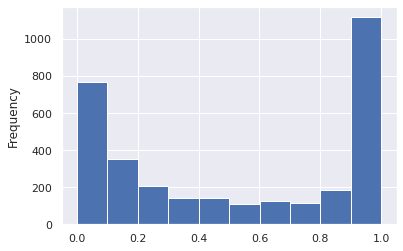

In [50]:
test ['prob_']= pd.DataFrame(finalmodel.predict(test_pad))
print("\nFigure - Probability distribution on whether a tweet talks really about disaster or not.\n")
test ['prob_'].plot.hist()

In [51]:
#merging preprocessed text with the df
left = dataset_test
right = test
dataset_test= pd.merge(left, right, on='text')

In [52]:
dataset_test['target'] = dataset_test['prob_'].apply(lambda x: int(round(x)))
print("Number of predicted regular [0] and disaster [1] risks: \n")
dataset_test['target'].value_counts()

Number of predicted regular [0] and disaster [1] risks: 



1    1678
0    1627
Name: target, dtype: int64

In [53]:
dataset_test[['text_clean','target']].sample(10).to_numpy()

array([['cta green line passenger evacuate derailment service garfieldcottage grove   tcoqepj0hwpay',
        0],
       ['beforeitsnew ûthis damage control fool folk perp come plan b',
        1],
       ['nephew proof fat baby save apocalypse   tcon5vimoqhbg', 1],
       ['blizzarddraco sawlet eat blaze blazinsmasher', 1],
       ['wreckage conclusively confirm mh370 malaysia pm investigator family   tcoo8stw4yn8r',
        1],
       ['amp underconstruction demolish melbourne residential commercial builder luxuryhome townhouse    tco6id7czvmed',
        0],
       ['stefsy14 birthday massacre', 0],
       ['donation difference life survivor braininjury donate today   tconof8f0rscb',
        0],
       ['loud ass thunderstorm reason', 1],
       ['bestseller trouble buffetts favorite sector   tco4wa9cms3cz', 0]],
      dtype=object)

In [54]:
#checkpoint
dataset_test.to_csv('data\test_predicted.csv', index=False)

In [58]:
#submission
output = pd.DataFrame({'id': dataset_test["id"],
                       'target': dataset_test["target"]})
output.to_csv('data/submission.csv', index=False)

## Word clouds on submission text

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Number of words found 1678 

Figure - Word clouds in cleaned text predicted as disaster in submission file



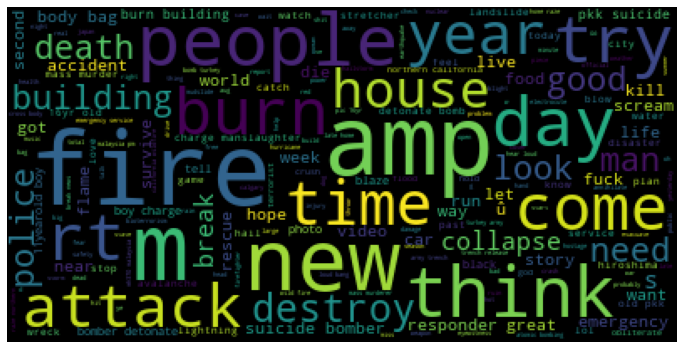

In [57]:
# creating wordclouds for disaster tweets
mask1 = dataset_test["target"] == 1 
words_d = dataset_test.loc[mask1,"text_clean"].values
print("Number of words found", len(words_d),"\n")
print("Figure - Word clouds in cleaned text predicted as disaster in submission file\n")
plt.figure(figsize=(12,8))
word_cloud = WordCloud(background_color='black',
                       max_font_size = 60
                         ).generate(" ".join(words_d))
plt.imshow(word_cloud)
plt.axis('off')
plt.savefig('figs/wordcloud_testset_disaster.png')
plt.show()

--- End of Notebook ---
# END